#  IPE PYTHON II_Paula Escusol Entío


In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.experimental import enable_iterative_imputer
from sklearn.feature_selection import RFE
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, recall_score, \
    matthews_corrcoef, precision_score, confusion_matrix, make_scorer

In [2]:
conda install -c conda-forge missingno

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
import missingno as msno

In [4]:
#Inserting and readingg the data (excel file)
df = pd.read_excel("AUTO_LOANS_DATA.xlsx")
df

,REPORTING_DATE,ACCOUNT_NUMBER,CUSTOMER_ID,PROGRAM_NAME,LOAN_OPEN_DATE,EXPECTED_CLOSE_DATE,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING,BUCKET,SEX,CUSTOMER_OPEN_DATE,BIRTH_DATE,PROFESSION,CAR_TYPE
0,2016-01-31,1,1,Auto Loans 50% Down Payment - Employed,2015-11-25,2020-11-03,91000.0,88223.40,0,M,2015-10-27,1986-03-24,EMPLOYEE,KIA
1,2016-01-31,2,2,Pick Up and Small Trucks,2015-12-08,2017-12-03,35000.0,33714.82,0,M,2015-11-29,1985-08-18,EMPLOYEE,CARRY
2,2016-01-31,3,3,Auto Loans 40% Down Payment - Employed,2016-01-12,2021-01-03,52500.0,52500.00,0,F,2015-12-28,1985-07-02,HOUSEWIFE,CHEVROLET
3,2016-01-31,4,4,Auto Loans 30% Down Payment - Self Employed,2015-11-23,2019-10-03,103000.0,99054.45,0,M,2015-10-21,1979-01-01,Shop Owner,MITSUBISHI
4,2016-01-31,5,5,Auto Loans 30% Down Payment - Self Employed,2015-11-23,2018-11-03,94250.0,89450.17,0,M,2015-11-02,1977-01-20,Shop Owner,SEAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900855,2019-08-29,36547,35528,Auto Loans 50% Down Payment - Employed,2018-09-27,2023-09-03,90000.0,78956.52,0,M,2018-09-16,1993-10-20,EMPLOYEE,Gelory
900856,2019-08-29,39597,38396,Auto Loans 50% Down Payment - Employed,2019-08-28,2024-09-03,92500.0,92826.06,0,F,2019-08-15,1977-09-01,Manager,Gelory
900857,2019-08-29,38016,36905,Pick Up and Small Trucks,2019-03-21,2021-03-03,140250.0,114919.47,0,M,2019-01-29,1980-01-05,Company Owner,NISSAN
900858,2019-08-29,38899,37739,Pick Up and Small Trucks,2019-06-26,2024-06-03,105000.0,101714.25,0,M,2019-05-28,1986-04-04,Company Owner,DFSK


In [5]:
df.describe()

,ACCOUNT_NUMBER,CUSTOMER_ID,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING,BUCKET
count,900860.000000,900860.000000,9.008600e+05,9.008600e+05,900860.000000
mean,18640.732433,17934.779021,8.871387e+04,6.082437e+04,0.282671
std,10383.344609,10143.452204,5.487869e+04,5.363223e+04,0.763767
min,1.000000,1.000000,1.500000e+04,-1.114100e+02,0.000000
25%,9788.000000,9287.000000,5.600000e+04,2.570558e+04,0.000000
50%,19073.000000,18248.000000,7.550000e+04,4.828475e+04,0.000000
75%,27258.000000,26383.000000,1.050000e+05,8.173332e+04,0.000000
max,39597.000000,38396.000000,2.000000e+06,2.000000e+06,7.000000


In [6]:
df.dtypes

REPORTING_DATE            datetime64[ns]
ACCOUNT_NUMBER                     int64
CUSTOMER_ID                        int64
PROGRAM_NAME                      object
LOAN_OPEN_DATE            datetime64[ns]
EXPECTED_CLOSE_DATE       datetime64[ns]
ORIGINAL_BOOKED_AMOUNT           float64
OUTSTANDING                      float64
BUCKET                             int64
SEX                               object
CUSTOMER_OPEN_DATE        datetime64[ns]
BIRTH_DATE                datetime64[ns]
PROFESSION                        object
CAR_TYPE                          object
dtype: object

In [7]:
df.head()

,REPORTING_DATE,ACCOUNT_NUMBER,CUSTOMER_ID,PROGRAM_NAME,LOAN_OPEN_DATE,EXPECTED_CLOSE_DATE,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING,BUCKET,SEX,CUSTOMER_OPEN_DATE,BIRTH_DATE,PROFESSION,CAR_TYPE
0,2016-01-31,1,1,Auto Loans 50% Down Payment - Employed,2015-11-25,2020-11-03,91000.0,88223.40,0,M,2015-10-27,1986-03-24,EMPLOYEE,KIA
1,2016-01-31,2,2,Pick Up and Small Trucks,2015-12-08,2017-12-03,35000.0,33714.82,0,M,2015-11-29,1985-08-18,EMPLOYEE,CARRY
2,2016-01-31,3,3,Auto Loans 40% Down Payment - Employed,2016-01-12,2021-01-03,52500.0,52500.00,0,F,2015-12-28,1985-07-02,HOUSEWIFE,CHEVROLET
3,2016-01-31,4,4,Auto Loans 30% Down Payment - Self Employed,2015-11-23,2019-10-03,103000.0,99054.45,0,M,2015-10-21,1979-01-01,Shop Owner,MITSUBISHI
4,2016-01-31,5,5,Auto Loans 30% Down Payment - Self Employed,2015-11-23,2018-11-03,94250.0,89450.17,0,M,2015-11-02,1977-01-20,Shop Owner,SEAT


## 0. Basic steps

### 1. Change the name of the columns to lower case

In [8]:
print(list(df.columns))

['REPORTING_DATE', 'ACCOUNT_NUMBER', 'CUSTOMER_ID', 'PROGRAM_NAME', 'LOAN_OPEN_DATE', 'EXPECTED_CLOSE_DATE', 'ORIGINAL_BOOKED_AMOUNT', 'OUTSTANDING', 'BUCKET', 'SEX', 'CUSTOMER_OPEN_DATE', 'BIRTH_DATE', 'PROFESSION', 'CAR_TYPE']


In [9]:
#We want to transform the name of all the columns to lower case
df.rename(columns=lambda x: x.lower(), inplace=True)

In [10]:
print(list(df.columns))

['reporting_date', 'account_number', 'customer_id', 'program_name', 'loan_open_date', 'expected_close_date', 'original_booked_amount', 'outstanding', 'bucket', 'sex', 'customer_open_date', 'birth_date', 'profession', 'car_type']


## 1. Missing not at random analysis -  Analyzing missing values. 

<AxesSubplot:>

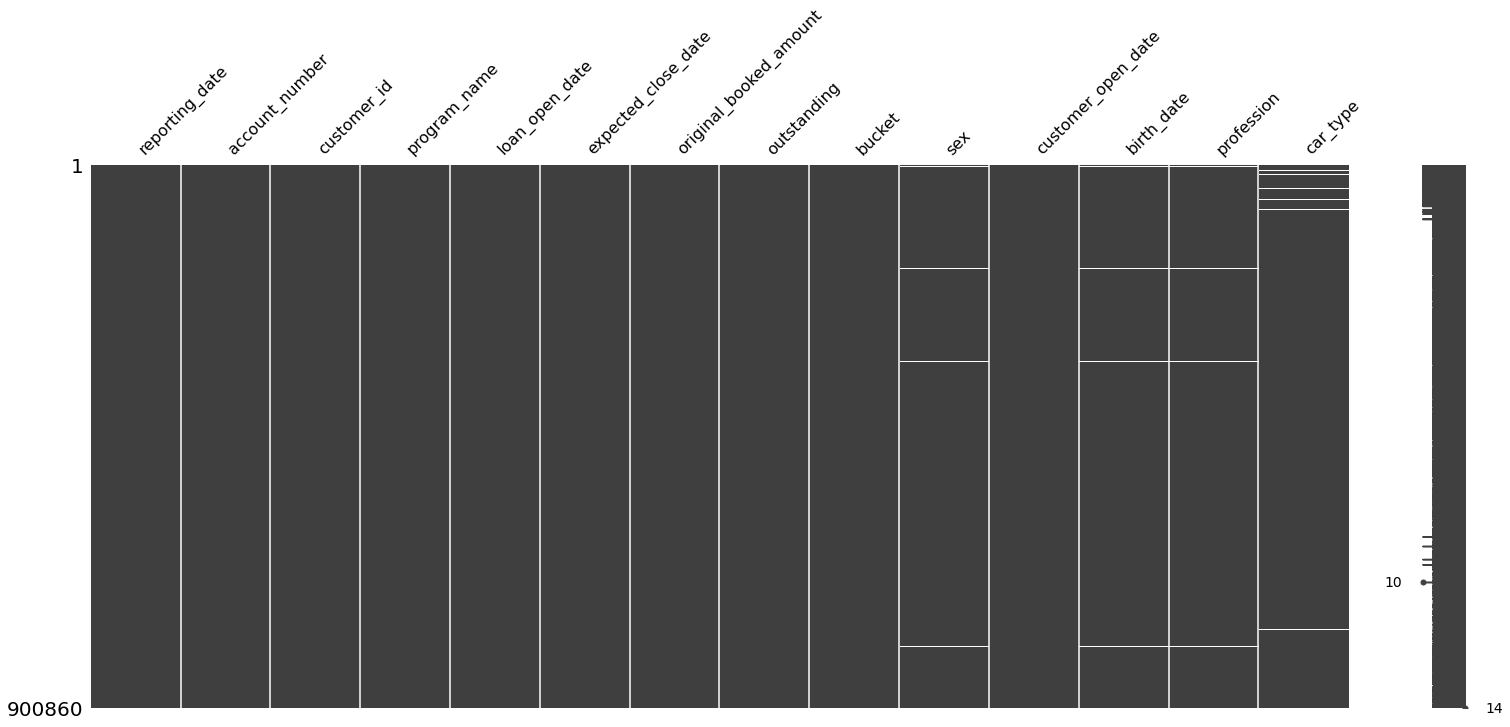

In [11]:
#Visualize the distribution of the missing values
msno.matrix(df)


<AxesSubplot:>

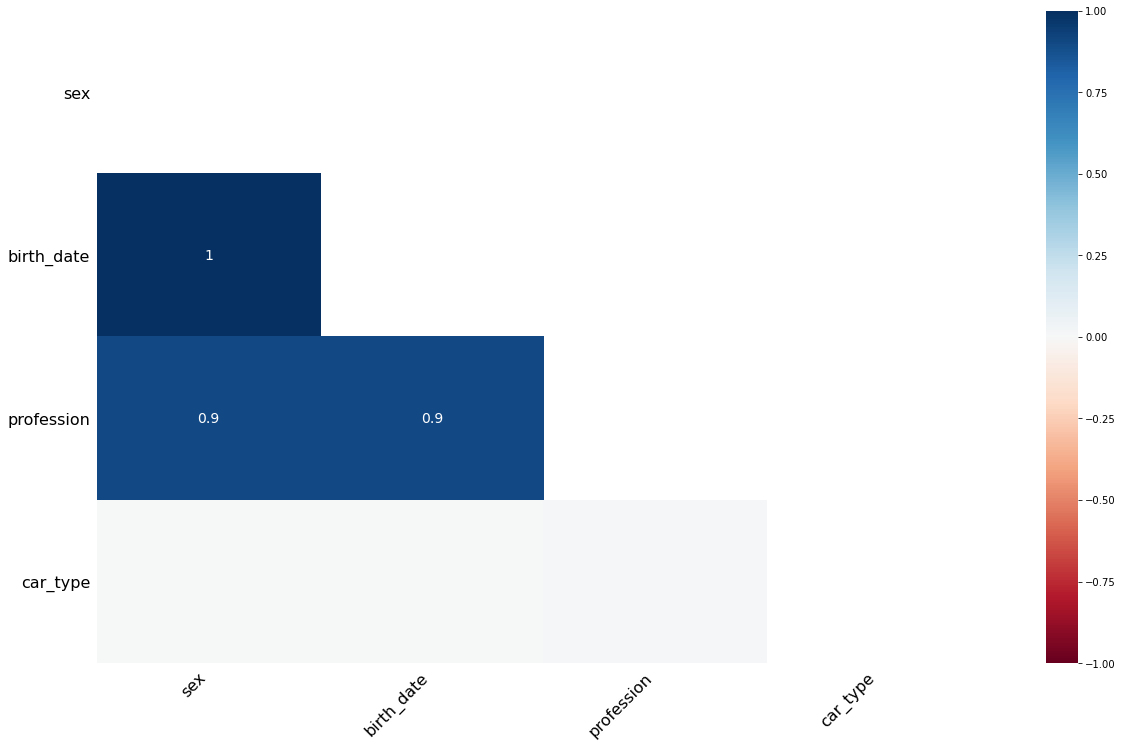

In [12]:
#We use the heatmap to identify if there is a relationship in the presence of null values between the columns:
    #Values close to positive 1 indicate that the presence of null values in one column is correlated with the presence of null values in another column.
    #Values close to negative 1 indicate that the presence of null values in one column is anti-correlated with the presence of null values in another column.
    #Values close to 0, indicate there is little to no relationship between the presence of null values in one column compared to another.
msno.heatmap(df)


<AxesSubplot:>

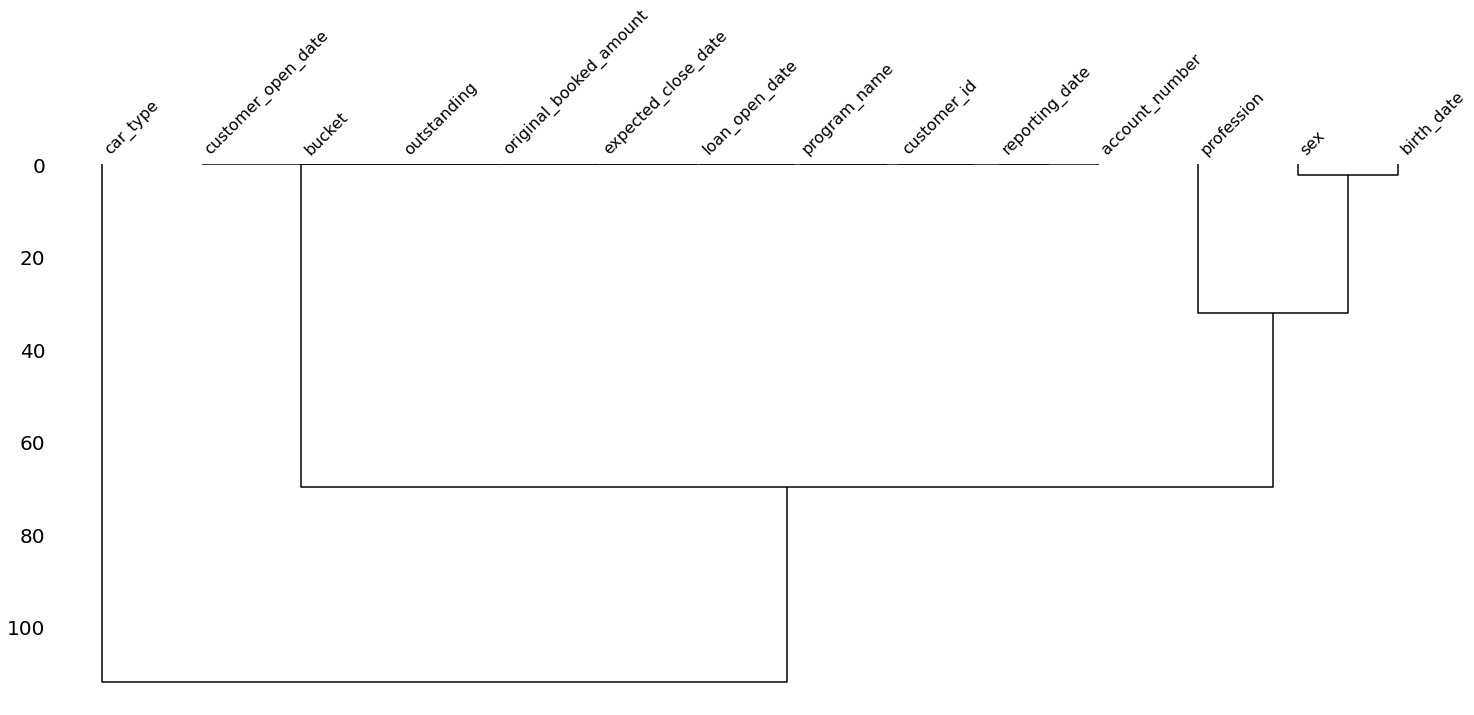

In [13]:
msno.dendrogram(df)
#In the dendrogram plot below, we can see we have three distinct groups:
    #The first is on the right side (profession, sex, and birth_date) which all have a high degree of null values;
    
    #The second is on the left, with the remainder of the columns which are more complete (customer_open_date,
    #bucket, outstanding, original_booked_amoount...) are all grouped together at zero indicating that they
    #are complete.
    
    #The variable car_type also has a high degree of high values. However, as we have seen in the heatmap above, 
    #the presence of null values in the car_type variable is anti-correlated with the presence of null values in 
    #any other column. 
    

## 2. Data Preparation

### 1. Removing duplicate records

In [14]:
#Let’s explore if there are any duplicate values in the dataset:
df['customer_id'].value_counts()

12       3682
298       246
174       163
1968      105
2066      100
         ... 
38197       1
38347       1
38298       1
5298        1
13136       1
Name: customer_id, Length: 38396, dtype: int64

In [15]:
# We can see that some of the records (customers) are recorded multiple times. In case we decided to remove the
# duplicate records, our approach would be to keep only the last record for each customer, as follows:
    #df.sort_values(by=['loan_open_date'])
    #df.drop_duplicates('customer_id', keep = 'last', inplace = True)
    
#However, to be able to analyze the accuracy of our model when splitting the dataset (refer to section "Risk Based
#Segmentation by variable" of the document) we have decided not to remove the duplicate records.

### 2. Creating a new column "user type" to identify the type of user: Corporate (1) vs. Individuals (0)

In [16]:
#Duplicating the column "program_name" to a new column "user_type" to later identify the type of the user: corporates or individuals
df['user_type'] = df.apply(lambda row: row.program_name, axis = 1)
df

,reporting_date,account_number,customer_id,program_name,loan_open_date,expected_close_date,original_booked_amount,outstanding,bucket,sex,customer_open_date,birth_date,profession,car_type,user_type
0,2016-01-31,1,1,Auto Loans 50% Down Payment - Employed,2015-11-25,2020-11-03,91000.0,88223.40,0,M,2015-10-27,1986-03-24,EMPLOYEE,KIA,Auto Loans 50% Down Payment - Employed
1,2016-01-31,2,2,Pick Up and Small Trucks,2015-12-08,2017-12-03,35000.0,33714.82,0,M,2015-11-29,1985-08-18,EMPLOYEE,CARRY,Pick Up and Small Trucks
2,2016-01-31,3,3,Auto Loans 40% Down Payment - Employed,2016-01-12,2021-01-03,52500.0,52500.00,0,F,2015-12-28,1985-07-02,HOUSEWIFE,CHEVROLET,Auto Loans 40% Down Payment - Employed
3,2016-01-31,4,4,Auto Loans 30% Down Payment - Self Employed,2015-11-23,2019-10-03,103000.0,99054.45,0,M,2015-10-21,1979-01-01,Shop Owner,MITSUBISHI,Auto Loans 30% Down Payment - Self Employed
4,2016-01-31,5,5,Auto Loans 30% Down Payment - Self Employed,2015-11-23,2018-11-03,94250.0,89450.17,0,M,2015-11-02,1977-01-20,Shop Owner,SEAT,Auto Loans 30% Down Payment - Self Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900855,2019-08-29,36547,35528,Auto Loans 50% Down Payment - Employed,2018-09-27,2023-09-03,90000.0,78956.52,0,M,2018-09-16,1993-10-20,EMPLOYEE,Gelory,Auto Loans 50% Down Payment - Employed
900856,2019-08-29,39597,38396,Auto Loans 50% Down Payment - Employed,2019-08-28,2024-09-03,92500.0,92826.06,0,F,2019-08-15,1977-09-01,Manager,Gelory,Auto Loans 50% Down Payment - Employed
900857,2019-08-29,38016,36905,Pick Up and Small Trucks,2019-03-21,2021-03-03,140250.0,114919.47,0,M,2019-01-29,1980-01-05,Company Owner,NISSAN,Pick Up and Small Trucks
900858,2019-08-29,38899,37739,Pick Up and Small Trucks,2019-06-26,2024-06-03,105000.0,101714.25,0,M,2019-05-28,1986-04-04,Company Owner,DFSK,Pick Up and Small Trucks


In [17]:
df["user_type"].replace({"Auto Loans Corporate Guarantee": "1", 
                         "Auto Loans 50% Down Payment - Employed": "0",
                        "Pick Up and Small Trucks": "0",
                        "Auto Loans 40% Down Payment - Employed": "0",
                        "Auto Loans 30% Down Payment - Self Employed": "0",
                        "Auto Loans 40% Down Payment - Self Employed": "0",
                        "Auto Loans 20% Down Payment - Employed": "0",
                        "Auto Loans 30% Down Payment - Employed": "0",
                        "Auto Loans 50% Down Payment - Self Employed": "0",
                        "Auto Loans Special Deals": "0",
                        "Auto Loans Payroll Clients": "0",
                        "Auto Loans Secured against CD": "0",
                        "Auto Loans Doctors - Employed": "0",
                        "Auto Loans Fully Secured": "0",
                        "Auto Loans Doctors - Self Employed": "0",
                        "Auto Loans 20% Down Payment - Self Employed": "0",
                        "Auto Loans 50% Down Payment No Car Prohibition - Self Employed": "0",
                        "Auto Loans Run Off - Self Employed":"0",
                        "Auto Loans Run Off - Employed": "0",
                        "Auto Loans 50% Down Payment No Car Prohibition - Employed": "0",
                        "Auto Loans 50% Down Payment Used Cars - Self Employed": "0",
                        "Auto Loans 50% Down Payment Used Cars - Employed": "0",
                        "Auto Loans 30% Down Payment Used Cars - Self Employed": "0",
                        "Auto Loans 30% Down Payment Used Cars - Employed": "0"}, inplace=True)

df

,reporting_date,account_number,customer_id,program_name,loan_open_date,expected_close_date,original_booked_amount,outstanding,bucket,sex,customer_open_date,birth_date,profession,car_type,user_type
0,2016-01-31,1,1,Auto Loans 50% Down Payment - Employed,2015-11-25,2020-11-03,91000.0,88223.40,0,M,2015-10-27,1986-03-24,EMPLOYEE,KIA,0
1,2016-01-31,2,2,Pick Up and Small Trucks,2015-12-08,2017-12-03,35000.0,33714.82,0,M,2015-11-29,1985-08-18,EMPLOYEE,CARRY,0
2,2016-01-31,3,3,Auto Loans 40% Down Payment - Employed,2016-01-12,2021-01-03,52500.0,52500.00,0,F,2015-12-28,1985-07-02,HOUSEWIFE,CHEVROLET,0
3,2016-01-31,4,4,Auto Loans 30% Down Payment - Self Employed,2015-11-23,2019-10-03,103000.0,99054.45,0,M,2015-10-21,1979-01-01,Shop Owner,MITSUBISHI,0
4,2016-01-31,5,5,Auto Loans 30% Down Payment - Self Employed,2015-11-23,2018-11-03,94250.0,89450.17,0,M,2015-11-02,1977-01-20,Shop Owner,SEAT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900855,2019-08-29,36547,35528,Auto Loans 50% Down Payment - Employed,2018-09-27,2023-09-03,90000.0,78956.52,0,M,2018-09-16,1993-10-20,EMPLOYEE,Gelory,0
900856,2019-08-29,39597,38396,Auto Loans 50% Down Payment - Employed,2019-08-28,2024-09-03,92500.0,92826.06,0,F,2019-08-15,1977-09-01,Manager,Gelory,0
900857,2019-08-29,38016,36905,Pick Up and Small Trucks,2019-03-21,2021-03-03,140250.0,114919.47,0,M,2019-01-29,1980-01-05,Company Owner,NISSAN,0
900858,2019-08-29,38899,37739,Pick Up and Small Trucks,2019-06-26,2024-06-03,105000.0,101714.25,0,M,2019-05-28,1986-04-04,Company Owner,DFSK,0


### 3. Transforming the variable "program_name" into a categorical variable. 

In [18]:
#The function below transforms the variable "program_name" into a categorical variable.

df['program_name'] = df.program_name.astype("category").cat.codes
df.program_name, df.dtypes

(0          8
 1         23
 2          6
 3          3
 4          3
           ..
 900855     8
 900856     8
 900857    23
 900858    23
 900859     6
 Name: program_name, Length: 900860, dtype: int8,
 reporting_date            datetime64[ns]
 account_number                     int64
 customer_id                        int64
 program_name                        int8
 loan_open_date            datetime64[ns]
 expected_close_date       datetime64[ns]
 original_booked_amount           float64
 outstanding                      float64
 bucket                             int64
 sex                               object
 customer_open_date        datetime64[ns]
 birth_date                datetime64[ns]
 profession                        object
 car_type                          object
 user_type                         object
 dtype: object)

In [19]:
df["program_name"] = df["program_name"].astype("category")
df.program_name, df.dtypes

(0          8
 1         23
 2          6
 3          3
 4          3
           ..
 900855     8
 900856     8
 900857    23
 900858    23
 900859     6
 Name: program_name, Length: 900860, dtype: category
 Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23],
 reporting_date            datetime64[ns]
 account_number                     int64
 customer_id                        int64
 program_name                    category
 loan_open_date            datetime64[ns]
 expected_close_date       datetime64[ns]
 original_booked_amount           float64
 outstanding                      float64
 bucket                             int64
 sex                               object
 customer_open_date        datetime64[ns]
 birth_date                datetime64[ns]
 profession                        object
 car_type                          object
 user_type                         object
 dtype: object)

In [20]:
feat_type = ['Categorical' if x.name == 'category' else 'Numerical' for x in df.dtypes]
feat_type

df

,reporting_date,account_number,customer_id,program_name,loan_open_date,expected_close_date,original_booked_amount,outstanding,bucket,sex,customer_open_date,birth_date,profession,car_type,user_type
0,2016-01-31,1,1,8,2015-11-25,2020-11-03,91000.0,88223.40,0,M,2015-10-27,1986-03-24,EMPLOYEE,KIA,0
1,2016-01-31,2,2,23,2015-12-08,2017-12-03,35000.0,33714.82,0,M,2015-11-29,1985-08-18,EMPLOYEE,CARRY,0
2,2016-01-31,3,3,6,2016-01-12,2021-01-03,52500.0,52500.00,0,F,2015-12-28,1985-07-02,HOUSEWIFE,CHEVROLET,0
3,2016-01-31,4,4,3,2015-11-23,2019-10-03,103000.0,99054.45,0,M,2015-10-21,1979-01-01,Shop Owner,MITSUBISHI,0
4,2016-01-31,5,5,3,2015-11-23,2018-11-03,94250.0,89450.17,0,M,2015-11-02,1977-01-20,Shop Owner,SEAT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900855,2019-08-29,36547,35528,8,2018-09-27,2023-09-03,90000.0,78956.52,0,M,2018-09-16,1993-10-20,EMPLOYEE,Gelory,0
900856,2019-08-29,39597,38396,8,2019-08-28,2024-09-03,92500.0,92826.06,0,F,2019-08-15,1977-09-01,Manager,Gelory,0
900857,2019-08-29,38016,36905,23,2019-03-21,2021-03-03,140250.0,114919.47,0,M,2019-01-29,1980-01-05,Company Owner,NISSAN,0
900858,2019-08-29,38899,37739,23,2019-06-26,2024-06-03,105000.0,101714.25,0,M,2019-05-28,1986-04-04,Company Owner,DFSK,0


### 4. Transforming the variable "birth_date" into age

In [21]:
df['age'] = pd.to_datetime(df['birth_date'], format='%Y-%m-%d')
df['age'] = ((df.reporting_date - df.birth_date)/np.timedelta64(1, 'Y'))

df.round({"age":0})

df.drop('birth_date', inplace=True, axis=1)
df

,reporting_date,account_number,customer_id,program_name,loan_open_date,expected_close_date,original_booked_amount,outstanding,bucket,sex,customer_open_date,profession,car_type,user_type,age
0,2016-01-31,1,1,8,2015-11-25,2020-11-03,91000.0,88223.40,0,M,2015-10-27,EMPLOYEE,KIA,0,29.856876
1,2016-01-31,2,2,23,2015-12-08,2017-12-03,35000.0,33714.82,0,M,2015-11-29,EMPLOYEE,CARRY,0,30.453740
2,2016-01-31,3,3,6,2016-01-12,2021-01-03,52500.0,52500.00,0,F,2015-12-28,HOUSEWIFE,CHEVROLET,0,30.582421
3,2016-01-31,4,4,3,2015-11-23,2019-10-03,103000.0,99054.45,0,M,2015-10-21,Shop Owner,MITSUBISHI,0,37.082213
4,2016-01-31,5,5,3,2015-11-23,2018-11-03,94250.0,89450.17,0,M,2015-11-02,Shop Owner,SEAT,0,39.028864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900855,2019-08-29,36547,35528,8,2018-09-27,2023-09-03,90000.0,78956.52,0,M,2018-09-16,EMPLOYEE,Gelory,0,25.856794
900856,2019-08-29,39597,38396,8,2019-08-28,2024-09-03,92500.0,92826.06,0,F,2019-08-15,Manager,Gelory,0,41.991280
900857,2019-08-29,38016,36905,23,2019-03-21,2021-03-03,140250.0,114919.47,0,M,2019-01-29,Company Owner,NISSAN,0,39.647631
900858,2019-08-29,38899,37739,23,2019-06-26,2024-06-03,105000.0,101714.25,0,M,2019-05-28,Company Owner,DFSK,0,33.402465


### 5. Removing Nans

#### a) Selecting only the numerics to replace NaNs or blanks with 0 

In [22]:
#Check the amount of missing values that we have in each variable
df.isnull().sum()

reporting_date                0
account_number                0
customer_id                   0
program_name                  0
loan_open_date                0
expected_close_date           0
original_booked_amount        0
outstanding                   0
bucket                        0
sex                        4528
customer_open_date            0
profession                 5558
car_type                  11518
user_type                     0
age                        4533
dtype: int64

In [23]:
list_numeric_columns = ['age']
for item in list_numeric_columns:
    df[item] = df[item].fillna(0).replace('NaN',0).replace('',0)

#### b) Selecting non-numerics to replace NaNs with blanks

In [24]:
# Within the non-numeric variables with missing values, we can distinguish two groups: 
    #1 - Non-numerics which have missing values related to the type of user (MNAR): Corporate users do not contain information
    #regarding the sex or profession.
    
    #2 - Non-numerics with missing at random data (MAR)- concretelly, the variable CAR_TYPE.
    
#We will deal with these situations differently: 

#1 - MNAR for Corporate users: 
       
list_non_numeric_columns = ['profession', 'sex']
for item in list_non_numeric_columns:
    df[item] = df[item].fillna('').replace('NaN','');
    
#2 - MAR for CAR_TYPE:
    #Once the variable CAR_TYPE is converted to a categorical variable, we will replace the missing values with 
    #the most common value of the variable (the mode). Refer to point "12 - Transforming the variable "car_type" 
    #to categorical" to see this point.
    

### 6. Transforming the variable "loan_open_date" into months that the row has been opened at the reporting date

In [25]:
# This function converts a given date (loan_open_date) to the number of months that the contract has been opened 
# at each reporting date.
                                   
df['months_loan_opened'] = ((df.reporting_date - df.loan_open_date)/np.timedelta64(1, 'M'))
df.drop('loan_open_date', inplace=True, axis=1)

df

,reporting_date,account_number,customer_id,program_name,expected_close_date,original_booked_amount,outstanding,bucket,sex,customer_open_date,profession,car_type,user_type,age,months_loan_opened
0,2016-01-31,1,1,8,2020-11-03,91000.0,88223.40,0,M,2015-10-27,EMPLOYEE,KIA,0,29.856876,2.201277
1,2016-01-31,2,2,23,2017-12-03,35000.0,33714.82,0,M,2015-11-29,EMPLOYEE,CARRY,0,30.453740,1.774164
2,2016-01-31,3,3,6,2021-01-03,52500.0,52500.00,0,F,2015-12-28,HOUSEWIFE,CHEVROLET,0,30.582421,0.624243
3,2016-01-31,4,4,3,2019-10-03,103000.0,99054.45,0,M,2015-10-21,Shop Owner,MITSUBISHI,0,37.082213,2.266987
4,2016-01-31,5,5,3,2018-11-03,94250.0,89450.17,0,M,2015-11-02,Shop Owner,SEAT,0,39.028864,2.266987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900855,2019-08-29,36547,35528,8,2023-09-03,90000.0,78956.52,0,M,2018-09-16,EMPLOYEE,Gelory,0,25.856794,11.039241
900856,2019-08-29,39597,38396,8,2024-09-03,92500.0,92826.06,0,F,2019-08-15,Manager,Gelory,0,41.991280,0.032855
900857,2019-08-29,38016,36905,23,2021-03-03,140250.0,114919.47,0,M,2019-01-29,Company Owner,NISSAN,0,39.647631,5.289636
900858,2019-08-29,38899,37739,23,2024-06-03,105000.0,101714.25,0,M,2019-05-28,Company Owner,DFSK,0,33.402465,2.102713


### 7. Transforming the variable "expected_close_date" into months.

In [26]:
# This function converts the "expected_close_date" variable into the number of months that the contract will still be opened.

df['months_to_close_loan'] = ((df.expected_close_date - df.reporting_date)/np.timedelta64(1, 'M'))
df.drop('expected_close_date', inplace=True, axis=1)

df

,reporting_date,account_number,customer_id,program_name,original_booked_amount,outstanding,bucket,sex,customer_open_date,profession,car_type,user_type,age,months_loan_opened,months_to_close_loan
0,2016-01-31,1,1,8,91000.0,88223.40,0,M,2015-10-27,EMPLOYEE,KIA,0,29.856876,2.201277,57.101789
1,2016-01-31,2,2,23,35000.0,33714.82,0,M,2015-11-29,EMPLOYEE,CARRY,0,30.453740,1.774164,22.078482
2,2016-01-31,3,3,6,52500.0,52500.00,0,F,2015-12-28,HOUSEWIFE,CHEVROLET,0,30.582421,0.624243,59.105936
3,2016-01-31,4,4,3,103000.0,99054.45,0,M,2015-10-21,Shop Owner,MITSUBISHI,0,37.082213,2.266987,44.058400
4,2016-01-31,5,5,3,94250.0,89450.17,0,M,2015-11-02,Shop Owner,SEAT,0,39.028864,2.266987,33.084868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900855,2019-08-29,36547,35528,8,90000.0,78956.52,0,M,2018-09-16,EMPLOYEE,Gelory,0,25.856794,11.039241,48.165260
900856,2019-08-29,39597,38396,8,92500.0,92826.06,0,F,2019-08-15,Manager,Gelory,0,41.991280,0.032855,60.190148
900857,2019-08-29,38016,36905,23,140250.0,114919.47,0,M,2019-01-29,Company Owner,NISSAN,0,39.647631,5.289636,18.135896
900858,2019-08-29,38899,37739,23,105000.0,101714.25,0,M,2019-05-28,Company Owner,DFSK,0,33.402465,2.102713,57.167498


### 8. Transforming the variable "customer_open_date" into months.

In [27]:
# This function converts the "customer_open_date" variable into the number of months that the customer has had a 
# contract has been opened at each reporting date 
                                   
df['months_client_opened'] = ((df.reporting_date - df.customer_open_date)/np.timedelta64(1, 'M'))
#df['months_client_opened'] = df['customer_open_date'].astype(int)
df.drop('customer_open_date', inplace=True, axis=1)

df

,reporting_date,account_number,customer_id,program_name,original_booked_amount,outstanding,bucket,sex,profession,car_type,user_type,age,months_loan_opened,months_to_close_loan,months_client_opened
0,2016-01-31,1,1,8,91000.0,88223.40,0,M,EMPLOYEE,KIA,0,29.856876,2.201277,57.101789,3.154069
1,2016-01-31,2,2,23,35000.0,33714.82,0,M,EMPLOYEE,CARRY,0,30.453740,1.774164,22.078482,2.069858
2,2016-01-31,3,3,6,52500.0,52500.00,0,F,HOUSEWIFE,CHEVROLET,0,30.582421,0.624243,59.105936,1.117066
3,2016-01-31,4,4,3,103000.0,99054.45,0,M,Shop Owner,MITSUBISHI,0,37.082213,2.266987,44.058400,3.351198
4,2016-01-31,5,5,3,94250.0,89450.17,0,M,Shop Owner,SEAT,0,39.028864,2.266987,33.084868,2.956940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900855,2019-08-29,36547,35528,8,90000.0,78956.52,0,M,EMPLOYEE,Gelory,0,25.856794,11.039241,48.165260,11.400645
900856,2019-08-29,39597,38396,8,92500.0,92826.06,0,F,Manager,Gelory,0,41.991280,0.032855,60.190148,0.459968
900857,2019-08-29,38016,36905,23,140250.0,114919.47,0,M,Company Owner,NISSAN,0,39.647631,5.289636,18.135896,6.965235
900858,2019-08-29,38899,37739,23,105000.0,101714.25,0,M,Company Owner,DFSK,0,33.402465,2.102713,57.167498,3.055504


### 9. Transforming the variable "sex" into dummy variables

In [28]:
#Transform the scales of the variable "sex" to 0 and 1, respectively.

# Get one hot encoding of column sex
one_hot = pd.get_dummies(df['sex'])
# Drop column sex as it is now encoded
df = df.drop('sex',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df 

,reporting_date,account_number,customer_id,program_name,original_booked_amount,outstanding,bucket,profession,car_type,user_type,age,months_loan_opened,months_to_close_loan,months_client_opened,,F,M
0,2016-01-31,1,1,8,91000.0,88223.40,0,EMPLOYEE,KIA,0,29.856876,2.201277,57.101789,3.154069,0,0,1
1,2016-01-31,2,2,23,35000.0,33714.82,0,EMPLOYEE,CARRY,0,30.453740,1.774164,22.078482,2.069858,0,0,1
2,2016-01-31,3,3,6,52500.0,52500.00,0,HOUSEWIFE,CHEVROLET,0,30.582421,0.624243,59.105936,1.117066,0,1,0
3,2016-01-31,4,4,3,103000.0,99054.45,0,Shop Owner,MITSUBISHI,0,37.082213,2.266987,44.058400,3.351198,0,0,1
4,2016-01-31,5,5,3,94250.0,89450.17,0,Shop Owner,SEAT,0,39.028864,2.266987,33.084868,2.956940,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900855,2019-08-29,36547,35528,8,90000.0,78956.52,0,EMPLOYEE,Gelory,0,25.856794,11.039241,48.165260,11.400645,0,0,1
900856,2019-08-29,39597,38396,8,92500.0,92826.06,0,Manager,Gelory,0,41.991280,0.032855,60.190148,0.459968,0,1,0
900857,2019-08-29,38016,36905,23,140250.0,114919.47,0,Company Owner,NISSAN,0,39.647631,5.289636,18.135896,6.965235,0,0,1
900858,2019-08-29,38899,37739,23,105000.0,101714.25,0,Company Owner,DFSK,0,33.402465,2.102713,57.167498,3.055504,0,0,1


### 10. Transforming the target variable "bucket" into dummy variables

In [29]:
# The variable "bucket" indicates the number of unpaid installements at each reporting date. We have transformed
# this variable to dummy variables to indicate whether the user has had unpaid installments (1) or not(0).
bucket_replace = {2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}
df = df.replace({'bucket': bucket_replace})


In [30]:
df['bucket'].unique()

array([0, 1])

### 11. Merging the variable "profession" and tranforming it into a categorical variable 

In [31]:
#Let’s explore in how many different professions we have in the dataset:

df['profession'].value_counts()

EMPLOYEE                     249135
Company Owner                150280
Manager                      115357
Shop Owner                   106136
Instructor / Teacher          59572
HOUSEWIFE                     52924
Accountant - Employee         29048
ENGINEER                      22832
DOCTOR                        17863
RETIRED                       15435
Unemployed                    11259
Contractor                     9140
PHARMACIST                     8799
NURSE                          6933
TECHNICIAN                     6754
SECRETARY                      5797
                               5558
Business Man / Trader          4082
PROFESSORS                     4023
Landlord                       3745
BANKER                         2174
DRIVER                         1596
Journalist                     1555
CHEMIST                        1284
TOUR LEADER                    1265
JEWELLER                       1245
RELIGION PERSON                1092
ARTIST                      

In [32]:
#First, lets transform all the scales of the "profession" variable to lower case
df["profession"] = df["profession"].str.lower()

In [33]:
#Now, since we have a lot of unneccesary categories, we will group all the scales into new categories and change 
#the type of the variable to categorical.
#The new categories that we will create are based on the existing categories, and will be: 
    #Employee (includes, among others, religious persons, military officers, politicians and athletes)
    #Company or shop owner
    #Homemaker (before: "housewife")
    #Retired
    #Unemployed
    #Landlord
    #Student
    
profession_replace = {"employee": "Employee", 
                          "company owner": "Company or shop owner", 
                         "manager": "Employee",
                        "shop owner": "Company or shop owner",
                       "instructor / teacher": "Employee",
                          "housewife": "Homemaker",
                          "accountant - employee": "Employee",
                          "engineer": "Employee",
                          "doctor": "Employee",
                          "retired": "Retired",
                          "unemployed": "Unemployed",
                          "contractor": "Employee",
                          "pharmacist": "Employee",
                          "nurse": "Employee",
                          "technician": "Employee",
                          "secretary": "Employee",
                          "business man / trader": "Employee",
                          "professors": "Employee",
                          "landlord": "Landlord",
                          "banker": "Employee",
                          "driver": "Employee",
                          "journalist": "Employee",
                          "chemist": "Employee",
                          "tour leader": "Employee",
                          "jeweller": "Employee",
                          "religion person": "Employee",
                          "artist": "Employee",
                          "broadcast / media": "Employee",
                          "athletes": "Employee",
                          "lawyer ? self employer": "Employee",
                          "craftsman": "Employee",
                          "car / boat agency / deale": "Employee",
                          "student": "Student",
                          "consultant": "Employee",
                          "hostess": "Employee",
                          "diver": "Employee",
                          "lawyer ? employee": "Employee",
                          "police officer": "Employee",
                          "bazaar shop owner": "Company or shop owner",
                          "pilot": "Employee",
                          "cae - current staff": "Employee",
                          "military officer": "Employee",
                          "cae ibs staff": "Employee",
                          "real estate broker / agen": "Employee",
                          "agrarian": "Employee",
                          "economist": "Employee",
                          "press": "Employee",
                          "cae ex-staff less than 10": "Employee",
                          "publisher": "Employee",
                          "politician": "Employee",
                          "hotel manager": "Employee"}

df = df.replace({'profession': profession_replace})

df['profession'] = df['profession'].astype(str)
df['profession'].value_counts()  

Employee                 554961
Company or shop owner    256512
Homemaker                 52924
Retired                   15435
Unemployed                11259
                           5558
Landlord                   3745
Student                     466
Name: profession, dtype: int64

In [34]:
## If instead of transforming the variable program_name, we want to create a new variable, we should do: 
#df['program_name_category'] = df.program_name.astype("category").cat.codes

df['profession'] = df.program_name.astype("category").cat.codes

In [35]:
df["profession"] = df["profession"].astype("category")
# https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
df.profession

0          8
1         23
2          6
3          3
4          3
          ..
900855     8
900856     8
900857    23
900858    23
900859     6
Name: profession, Length: 900860, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [36]:
feat_type = ['Categorical' if x.name == 'category' else 'Numerical' for x in df.dtypes]
feat_type
df

,reporting_date,account_number,customer_id,program_name,original_booked_amount,outstanding,bucket,profession,car_type,user_type,age,months_loan_opened,months_to_close_loan,months_client_opened,,F,M
0,2016-01-31,1,1,8,91000.0,88223.40,0,8,KIA,0,29.856876,2.201277,57.101789,3.154069,0,0,1
1,2016-01-31,2,2,23,35000.0,33714.82,0,23,CARRY,0,30.453740,1.774164,22.078482,2.069858,0,0,1
2,2016-01-31,3,3,6,52500.0,52500.00,0,6,CHEVROLET,0,30.582421,0.624243,59.105936,1.117066,0,1,0
3,2016-01-31,4,4,3,103000.0,99054.45,0,3,MITSUBISHI,0,37.082213,2.266987,44.058400,3.351198,0,0,1
4,2016-01-31,5,5,3,94250.0,89450.17,0,3,SEAT,0,39.028864,2.266987,33.084868,2.956940,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900855,2019-08-29,36547,35528,8,90000.0,78956.52,0,8,Gelory,0,25.856794,11.039241,48.165260,11.400645,0,0,1
900856,2019-08-29,39597,38396,8,92500.0,92826.06,0,8,Gelory,0,41.991280,0.032855,60.190148,0.459968,0,1,0
900857,2019-08-29,38016,36905,23,140250.0,114919.47,0,23,NISSAN,0,39.647631,5.289636,18.135896,6.965235,0,0,1
900858,2019-08-29,38899,37739,23,105000.0,101714.25,0,23,DFSK,0,33.402465,2.102713,57.167498,3.055504,0,0,1


### 12. Transforming the variable "car_type" into categorical variables

In [37]:
#As we did before, let’s explore in how many different car types we have in the dataset:
df['car_type'].unique()

array(['KIA', 'CARRY', 'CHEVROLET', 'MITSUBISHI', 'SEAT', 'SKODA',
       'RENAULT', 'MERCEDES', 'Jack', 'BYD', 'GELY', 'HYUNDAI', 'NISSAN',
       'Changan', 'Gelory', 'SUZUKI', 'BMW', nan, 'DAIHATSU',
       'Ssang Yong', 'BAIC', 'TOYOTA', 'LADA', 'MAZDA', 'Brilliance',
       'Kenbo', 'Speranza', 'Saipa', 'OPEL', 'Peugeot', 'Chana',
       'Citroen', 'Isuzu', 'PROTON', 'HONDA', 'VOLKSWAGEN', 'CHERY',
       'FIAT', 'SUBARU', 'JEEP', 'VOLVO', 'MINI', 'FORD', 'Great Wall',
       'MG', 'MABLE', 'HAIMA', 'CHANGY', 'AUDI', 'Mahindra', 'Livan',
       'FLORIDA', 'Dodge', 'ZEMEX', 'DFSK', 'SAWEAST', 'Zoty', 'Faw',
       'HAWTAI', 'JAGUAR', 'VICTORY'], dtype=object)

In [38]:
#We shall also transform all the scales to lower case
df["car_type"] = df["car_type"].str.lower()

In [39]:
df['car_type'].value_counts()

hyundai       181998
chevrolet     119271
nissan         97261
kia            86344
mitsubishi     77811
gely           73505
renault        61484
byd            30796
suzuki         20612
chery          18404
toyota         15302
lada            8879
speranza        8580
opel            8293
baic            6906
peugeot         6798
brilliance      6328
skoda           5701
gelory          4732
saipa           4542
jack            3920
bmw             3650
changan         3642
fiat            3125
proton          3095
mazda           2640
citroen         2355
jeep            2258
ssang yong      1955
isuzu           1799
kenbo           1776
daihatsu        1729
volkswagen      1619
seat            1519
ford            1479
subaru          1395
mercedes        1337
changy          1109
haima            858
dfsk             824
chana            746
zoty             611
honda            338
mg               273
audi             240
great wall       219
volvo            193
faw          

In [40]:
#Now, we want to group all the scales of the variable "car_type" into new categories, and change the type of the
#column to a categorical variable.
#The new categories that have been created are based on the continent of origin of the cars, and will be: 
    #Asian cars;
    #American cars;
    #European cars;
    #Others

car_type_replace = {'kia': "asian cars",
                    'carry': "others",
                    'chevrolet': "american cars",
                    'mitsubishi': "asian cars",
                    'seat': "european cars",
                    'skoda': "european cars",
                    'renault': "european cars",
                    'mercedes': "european cars",
                    'jack': "asian cars",
                    'byd': "asian cars",
                    'gely': "asian cars",
                    'hyundai': "asian cars",
                    'nissan': "asian cars",
                    'changan': "asian cars",
                    'gelory': "asian cars",
                    'suzuki': "asian cars",
                    'bmw': "european cars",
                    'daihatsu': "asian cars",
                    'ssang yong': "asian cars",
                    'baic': "asian cars",
                    'toyota': "asian cars",
                    'lada': "others",
                    'mazda': "asian cars",
                    'brilliance': "asian cars",
                    'kenbo': "asian cars",
                    'speranza': "others",
                    'saipa': "others",
                    'opel': "european cars",
                    'peugeot': "european cars",
                    'chana': "asian cars",
                    'citroen': "european cars",
                    'isuzu': "asian cars",
                    'proton': "asian cars",
                    'honda': "asian cars",
                    'volkswagen': "european cars",
                    'chery': "others",
                    'fiat': "european cars",
                    'subaru': "asian cars",
                    'jeep': "american cars",
                    'volvo': "european cars",
                    'mini': "european cars",
                    'ford': "american cars",
                    'great wall': "asian cars",
                    'mg': "european cars",
                    'mable': "asian cars",
                    'haima': "asian cars",
                    'changy': "asian cars",
                    'audi': "european cars",
                    'mahindra': "others",
                    'livan': "asian cars",
                    'florida': "others",
                    'dodge': "american cars",
                    'zemex': "asian cars",
                    'dfsk': "asian cars",
                    'saweast': "asian cars",
                    'zoty': "asian cars",
                    'faw': "asian cars",
                    'hawtai': "asian cars",
                    'jaguar': "european cars",
                    'victory': "american cars"}

df = df.replace({'car_type': car_type_replace})

#df['car_type'] = df['car_type'].astype(str)
df['car_type'].value_counts()  

asian cars       628827
american cars    123078
european cars     96728
others            40709
Name: car_type, dtype: int64

In [41]:
df['car_type'] = df.program_name.astype("category").cat.codes

In [42]:
df["car_type"] = df["car_type"].astype("category")
# https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
df.car_type, df.dtypes

(0          8
 1         23
 2          6
 3          3
 4          3
           ..
 900855     8
 900856     8
 900857    23
 900858    23
 900859     6
 Name: car_type, Length: 900860, dtype: category
 Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23],
 reporting_date            datetime64[ns]
 account_number                     int64
 customer_id                        int64
 program_name                    category
 original_booked_amount           float64
 outstanding                      float64
 bucket                             int64
 profession                      category
 car_type                        category
 user_type                         object
 age                              float64
 months_loan_opened               float64
 months_to_close_loan             float64
 months_client_opened             float64
                                    uint8
 F                                  uint8
 M                                  uint8
 dtype: object)

In [43]:
feat_type = ['Categorical' if x.name == 'category' else 'Numerical' for x in df.dtypes]
feat_type
# Then use feat_type in your class: cls.fit(X_train, y_train, X_test, y_test, feat_type=feat_type)

df

,reporting_date,account_number,customer_id,program_name,original_booked_amount,outstanding,bucket,profession,car_type,user_type,age,months_loan_opened,months_to_close_loan,months_client_opened,,F,M
0,2016-01-31,1,1,8,91000.0,88223.40,0,8,8,0,29.856876,2.201277,57.101789,3.154069,0,0,1
1,2016-01-31,2,2,23,35000.0,33714.82,0,23,23,0,30.453740,1.774164,22.078482,2.069858,0,0,1
2,2016-01-31,3,3,6,52500.0,52500.00,0,6,6,0,30.582421,0.624243,59.105936,1.117066,0,1,0
3,2016-01-31,4,4,3,103000.0,99054.45,0,3,3,0,37.082213,2.266987,44.058400,3.351198,0,0,1
4,2016-01-31,5,5,3,94250.0,89450.17,0,3,3,0,39.028864,2.266987,33.084868,2.956940,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900855,2019-08-29,36547,35528,8,90000.0,78956.52,0,8,8,0,25.856794,11.039241,48.165260,11.400645,0,0,1
900856,2019-08-29,39597,38396,8,92500.0,92826.06,0,8,8,0,41.991280,0.032855,60.190148,0.459968,0,1,0
900857,2019-08-29,38016,36905,23,140250.0,114919.47,0,23,23,0,39.647631,5.289636,18.135896,6.965235,0,0,1
900858,2019-08-29,38899,37739,23,105000.0,101714.25,0,23,23,0,33.402465,2.102713,57.167498,3.055504,0,0,1


In [44]:
#As we have previously analyzed, the missing values for the variable "car_type" are random and are not related 
#with the user_type. Therefore, wow that we have converted the variable "car_type" into a categorical variable, 
#we can inpute the mode to complete the missing values: 

df['car_type'].fillna(df['car_type'].mode()[0], inplace = True)

### 13. Dropping the variables "account_number", "customer_id" and "reporting_date"

In [45]:
#Since the aim of the project is to find which variables are good for segmentation, variables that only provide
#identification of the client or account (account_number and customer_id) do not provide relevant information and
#therefore, we have decided to remove them from the dataset. 

#Moreover, the variable "reporting_date" has also been removed from the dataset as it does not provide usefull
#information about any specific segment of the population. 

del df['account_number']
del df['reporting_date']
del df['customer_id']

### 14. Creating buckets for the variable "outstanding"

In [46]:
#The variable "outstanding" is a continue variable which probably holds as many unique values as records we have
#in our dataset. In order to be able to calculate the Information Gain of this variable towards the target 
#variable (bucket), we shall reduce the number of possible values of the "outstanding" variable. We will do so
#using qcut function to define the number of quantiles and divide up the data. 

pd.qcut(df['outstanding'], q=50)

0           (87618.211, 91888.498]
1            (33602.505, 35367.92]
2            (52301.399, 54395.75]
3          (96463.845, 101635.603]
4           (87618.211, 91888.498]
                    ...           
900855       (76315.411, 79888.05]
900856      (91888.498, 96463.845]
900857    (107878.758, 115283.997]
900858    (101635.603, 107878.758]
900859             (-111.411, 0.0]
Name: outstanding, Length: 900860, dtype: category
Categories (50, interval[float64]): [(-111.411, 0.0] < (0.0, 3270.708] < (3270.708, 6128.38] < (6128.38, 8634.269] ... (134895.416, 147983.681] < (147983.681, 166346.297] < (166346.297, 202755.383] < (202755.383, 2000000.0]]

In [47]:
#Then, we will store the bin results back in the original dataframe 

df['outstanding_quantile'] = pd.qcut(df['outstanding'], q=50, precision=0)
df

,program_name,original_booked_amount,outstanding,bucket,profession,car_type,user_type,age,months_loan_opened,months_to_close_loan,months_client_opened,,F,M,outstanding_quantile
0,8,91000.0,88223.40,0,8,8,0,29.856876,2.201277,57.101789,3.154069,0,0,1,"(87618.0, 91888.0]"
1,23,35000.0,33714.82,0,23,23,0,30.453740,1.774164,22.078482,2.069858,0,0,1,"(33603.0, 35368.0]"
2,6,52500.0,52500.00,0,6,6,0,30.582421,0.624243,59.105936,1.117066,0,1,0,"(52301.0, 54396.0]"
3,3,103000.0,99054.45,0,3,3,0,37.082213,2.266987,44.058400,3.351198,0,0,1,"(96464.0, 101636.0]"
4,3,94250.0,89450.17,0,3,3,0,39.028864,2.266987,33.084868,2.956940,0,0,1,"(87618.0, 91888.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900855,8,90000.0,78956.52,0,8,8,0,25.856794,11.039241,48.165260,11.400645,0,0,1,"(76315.0, 79888.0]"
900856,8,92500.0,92826.06,0,8,8,0,41.991280,0.032855,60.190148,0.459968,0,1,0,"(91888.0, 96464.0]"
900857,23,140250.0,114919.47,0,23,23,0,39.647631,5.289636,18.135896,6.965235,0,0,1,"(107879.0, 115284.0]"
900858,23,105000.0,101714.25,0,23,23,0,33.402465,2.102713,57.167498,3.055504,0,0,1,"(101636.0, 107879.0]"


In [48]:
#To be able to use this information for further analysis, we will transform the variable "outstanding_cuantile"
#into a categorical variable.

df['outstanding_quantile'] = df.program_name.astype("category").cat.codes
df["outstanding_quantile"] = df["outstanding_quantile"].astype("category")
df.program_name

0          8
1         23
2          6
3          3
4          3
          ..
900855     8
900856     8
900857    23
900858    23
900859     6
Name: program_name, Length: 900860, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [49]:
#Lastly, we can remove the original variable "outstanding" from our dataset since we won't be using it.

del df['outstanding']

## 2. Risk based segmentation: Splitting the data based on the user_type

### 1. Business segmentation

In [50]:
#By analyzing the data, we have seen that there are some variables missing not at random for certain users.
#Precisely, we have seen that the dataset contains two types of users: individuals and corporates. We can easily
#identify Corporates since these records have common missing values related to demographic information: 
    #SEX 
    #BIRTH_DATE (now transformed to AGE)
    #PROFESSION
#Therefore, we conclude that the first criteria for segmentation (business segmentation or risk segmentation) 
#shall be based on the user_type: individuals vs. corporates.

dfIndividuals, dfCorporates = [x for _, x in df.groupby(df['user_type'] == '1')]

In [51]:
dfIndividuals

,program_name,original_booked_amount,bucket,profession,car_type,user_type,age,months_loan_opened,months_to_close_loan,months_client_opened,,F,M,outstanding_quantile
0,8,91000.0,0,8,8,0,29.856876,2.201277,57.101789,3.154069,0,0,1,8
1,23,35000.0,0,23,23,0,30.453740,1.774164,22.078482,2.069858,0,0,1,23
2,6,52500.0,0,6,6,0,30.582421,0.624243,59.105936,1.117066,0,1,0,6
3,3,103000.0,0,3,3,0,37.082213,2.266987,44.058400,3.351198,0,0,1,3
4,3,94250.0,0,3,3,0,39.028864,2.266987,33.084868,2.956940,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900855,8,90000.0,0,8,8,0,25.856794,11.039241,48.165260,11.400645,0,0,1,8
900856,8,92500.0,0,8,8,0,41.991280,0.032855,60.190148,0.459968,0,1,0,8
900857,23,140250.0,0,23,23,0,39.647631,5.289636,18.135896,6.965235,0,0,1,23
900858,23,105000.0,0,23,23,0,33.402465,2.102713,57.167498,3.055504,0,0,1,23


In [52]:
dfCorporates

,program_name,original_booked_amount,bucket,profession,car_type,user_type,age,months_loan_opened,months_to_close_loan,months_client_opened,,F,M,outstanding_quantile
11,14,600000.0,0,14,14,1,0.0,0.689953,45.898273,182.903140,1,0,0,14
173,14,153900.0,0,14,14,1,0.0,0.000000,23.096984,27.302409,1,0,0,14
252,14,142200.0,0,14,14,1,0.0,1.577034,22.078482,27.302409,1,0,0,14
298,14,91500.0,0,14,14,1,0.0,31.179285,4.074006,87.295427,1,0,0,14
301,14,80000.0,0,14,14,1,0.0,2.464116,56.904659,182.903140,1,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900033,14,184000.0,0,14,14,1,0.0,0.262839,38.998747,336.499723,1,0,0,14
900138,14,152000.0,0,14,14,1,0.0,24.706873,22.965564,225.811618,1,0,0,14
900187,14,732000.0,0,14,14,1,0.0,4.369700,19.154397,30.456478,0,0,1,14
900300,14,172000.0,0,14,14,1,0.0,19.384382,4.172570,110.983798,1,0,0,14


# Computing information gain for each variable

In [53]:
from sklearn.model_selection import train_test_split
df_random_sample, _ = train_test_split(df, test_size=0.2)

In [54]:
df1 = df_random_sample

In [55]:
target = 'bucket'
descriptive_feature = ['program_name', 'original_booked_amount', 'profession', 'car_type', 'user_type', 'age', 'months_loan_opened', 'months_to_close_loan', 'months_client_opened', 'F', 'M', 'outstanding_quantile'],

In [56]:
import io
import requests

In [57]:
#Information gain is used for determining the best features/attributes that render maximum information about a 
#target variable.

import io
import requests

class InformationGain():
    
    def  __init__(self, target, descriptive_feature):
         self.target = target
         self.descriptive_feature = descriptive_feature
        
def compute_impurity(feature, impurity_criterion):
    
    #This function calculates impurity of a feature. Supported impurity criteria: 'entropy', 'gini'.
    
    probs = feature.value_counts(normalize=True)
    
    if impurity_criterion == 'entropy':
        impurity = -1 * np.sum(np.log2(probs) * probs)
    elif impurity_criterion == 'gini':
        impurity = 1 - np.sum(np.square(probs))
    else:
        raise ValueError('Unknown impurity criterion')
        
    return(round(impurity, 3))    

target_entropy = compute_impurity(df[target], 'entropy')
target_entropy

def comp_feature_information_gain(df1, target, descriptive_feature, split_criterion):
    
    # This function calculates information gain for splitting on a particular descriptive feature for a given 
    # dataset and a given impurity criteria.
        
    print('target variable:', target)
    print('descriptive_feature:', descriptive_feature)
    print('split criterion:', split_criterion)
            
    target_entropy = compute_impurity(df1[target], split_criterion)

    # Two lists have been defined:
        # entropy_list to store the entropy of each partition
        # weight_list to store the relative number of observations in each partition
    entropy_list = list()
    weight_list = list()
    
    # Loop over each level of the feature to partition the dataset with respect to that level and compute
    # the entropy and the weight of the level's partition
    
    for level in df[descriptive_feature].unique():
        df_feature_level = df1[df1[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target], split_criterion)
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))

    #print('impurity of partitions:', entropy_list)
    #print('weights of partitions:', weight_list)

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    #print('remaining impurity:', feature_remaining_impurity)
    
    information_gain = target_entropy - feature_remaining_impurity
    print('information gain:', information_gain)
    if information_gain <0.1:
        print("Not good for segmentation. Information Gain ratio not significant for BUCKET variable.")
    else:
        print("Good for segmentation. Pending further analysis")
    
    print('====================')
    
    return(information_gain)

#I have determined that for a variable to be significant for the segmentation, its Information Gain Ratio should be >0.1
#Information gain method obtained from: https://www.kaggle.com/edouarddesprez/health-insurance-auc-0-857

In [58]:
information_gain_list = list()
descriptive_feature_list = list()

split_criteria = 'gini'
for feature in df.drop(columns='bucket').columns:
    feature_info_gain = comp_feature_information_gain(df1, 'bucket', feature, split_criteria)
    information_gain_list.append(feature_info_gain)
    descriptive_feature_list.append(feature)

target variable: bucket
descriptive_feature: program_name
split criterion: gini
information gain: 0.05892499999999998
Not good for segmentation. Information Gain ratio not significant for BUCKET variable.
target variable: bucket
descriptive_feature: original_booked_amount
split criterion: gini
information gain: 0.10813899999999999
Good for segmentation. Pending further analysis
target variable: bucket
descriptive_feature: profession
split criterion: gini
information gain: 0.05892499999999998
Not good for segmentation. Information Gain ratio not significant for BUCKET variable.
target variable: bucket
descriptive_feature: car_type
split criterion: gini
information gain: 0.05892499999999998
Not good for segmentation. Information Gain ratio not significant for BUCKET variable.
target variable: bucket
descriptive_feature: user_type
split criterion: gini
information gain: 0.05812399999999998
Not good for segmentation. Information Gain ratio not significant for BUCKET variable.
target variab

# Logistic regression model - all variables

In [59]:
target = 'bucket'
all_variables = ['program_name', 'original_booked_amount', 'profession', 'car_type', 'user_type', 'age', 'months_loan_opened', 'months_to_close_loan', 'months_client_opened', 'F', 'M', 'outstanding_quantile']

In [60]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
splitter = train_test_split
"-----------------------"

df_train, df_test = splitter(df1, test_size = 0.2, random_state = 42)

In [61]:
X_train = df_train[all_variables]
y_train = df_train[target]

In [62]:
X_test = df_test[all_variables]
y_test = df_test[target]

In [63]:
from sklearn.linear_model import LogisticRegression
method = LogisticRegression(random_state=0)
fitted_full_model = method.fit(X_train, y_train)
y_pred = fitted_full_model.predict(X_test)

In [64]:
y_pred = fitted_full_model.predict_proba(X_test)[:,0]

In [65]:
y_pred

array([0.70987655, 0.88116528, 0.88887006, ..., 0.84530381, 0.84575563,
       0.94909639])

In [66]:
y_test

217527    0
234069    0
575765    0
195078    1
325386    1
         ..
789965    1
439299    0
472298    0
482297    1
878495    0
Name: bucket, Length: 144138, dtype: int64

In [67]:
#GINI Coefficient
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr,tpr)
GINI = (2*roc_auc) -1
GINI

-0.21576406947568583

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#X_train, X_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [69]:
#Computing the accuracy of our model
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90    118839
           1       0.00      0.00      0.00     25299

    accuracy                           0.82    144138
   macro avg       0.41      0.50      0.45    144138
weighted avg       0.68      0.82      0.75    144138



/Users/paula/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


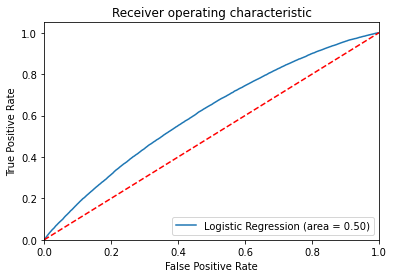

In [71]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[118839      0]
 [ 25299      0]]


## Risk Based Segmentation by variable: 

In [ ]:
# Now, we will be analyzing the accuracy of our model dividing our dataset by the variables with higher information
# gain, as ocmputed in the step above. 

### Splitting by age 

In [73]:
for i in range(25, 85, 10):
#segment 1
    df_train_seg1, df_train_seg2 = [x for _, x in df.groupby(df['age'] < i)]
    df_test_seg1, df_test_seg2 = [x for _, x in df.groupby(df['age'] < i)]
    X_train_seg1 = df_train_seg1[all_variables]
    y_train_seg1 = df_train_seg1[target]
    X_test_seg1 = df_test_seg1[all_variables]
    y_test_seg1 = df_test_seg1[target]
    fitted_model_seg1 = method.fit(X_train_seg1, y_train_seg1)
    y_pred_seg1 = fitted_model_seg1.predict(X_test_seg1)
    y_pred_seg1_fullmodel = fitted_full_model.predict(X_test_seg1)

#segment 2
    X_train_seg2 = df_train_seg2[all_variables]
    y_train_seg2 = df_train_seg2[target]
    X_test_seg2 = df_test_seg2[all_variables]
    y_test_seg2 = df_test_seg2[target]
    fitted_model_seg2 = method.fit(X_train_seg2, y_train_seg2)
    y_pred_seg2 = fitted_model_seg2.predict(X_test_seg2)
    y_pred_seg2_fullmodel = fitted_full_model.predict(X_test_seg2)

#printing results
    print ("     ")
    print("Variable analyzed: AGE > or < to", i)
    print("     SEGMENT 1: Model Developed on Seg 1 (train sample) applied on Seg 1 (test sample):",accuracy_score(y_test_seg1, y_pred_seg1))
    print("     SEGMENT 1: Model Developed on Full Population (train sample) applied on Seg 1 (test sample):",accuracy_score(y_test_seg1, y_pred_seg1_fullmodel))
    print ("     ")
    print("     SEGMENT 2: Model Developed on Full Population (train sample) applied on Seg 2 (test sample):",accuracy_score(y_test_seg2, y_pred_seg2_fullmodel))
    print("     SEGMENT 2: Model Developed on Seg 2 (train sample) applied on Seg 2 (test sample):",accuracy_score(y_test_seg2, y_pred_seg2))
    print ("     ")
    print ("     ==============")

     
Variable analyzed: AGE > or < to 25
     SEGMENT 1: Model Developed on Seg 1 (train sample) applied on Seg 1 (test sample): 0.8249633788508896
     SEGMENT 1: Model Developed on Full Population (train sample) applied on Seg 1 (test sample): 0.8249633788508896
     
     SEGMENT 2: Model Developed on Full Population (train sample) applied on Seg 2 (test sample): 0.8340581247348324
     SEGMENT 2: Model Developed on Seg 2 (train sample) applied on Seg 2 (test sample): 0.8340581247348324
     
     
Variable analyzed: AGE > or < to 35
     SEGMENT 1: Model Developed on Seg 1 (train sample) applied on Seg 1 (test sample): 0.8387931250245816
     SEGMENT 1: Model Developed on Full Population (train sample) applied on Seg 1 (test sample): 0.8387931250245816
     
     SEGMENT 2: Model Developed on Full Population (train sample) applied on Seg 2 (test sample): 0.8028129008076182
     SEGMENT 2: Model Developed on Seg 2 (train sample) applied on Seg 2 (test sample): 0.8028129008076182
  

/Users/paula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


     
Variable analyzed: AGE > or < to 45
     SEGMENT 1: Model Developed on Seg 1 (train sample) applied on Seg 1 (test sample): 0.8557978618866273
     SEGMENT 1: Model Developed on Full Population (train sample) applied on Seg 1 (test sample): 0.8557978618866273
     
     SEGMENT 2: Model Developed on Full Population (train sample) applied on Seg 2 (test sample): 0.8120608444777505
     SEGMENT 2: Model Developed on Seg 2 (train sample) applied on Seg 2 (test sample): 0.8120608444777505
     
     
Variable analyzed: AGE > or < to 55
     SEGMENT 1: Model Developed on Seg 1 (train sample) applied on Seg 1 (test sample): 0.8730700888450148
     SEGMENT 1: Model Developed on Full Population (train sample) applied on Seg 1 (test sample): 0.8730700888450148
     
     SEGMENT 2: Model Developed on Full Population (train sample) applied on Seg 2 (test sample): 0.8190779928960928
     SEGMENT 2: Model Developed on Seg 2 (train sample) applied on Seg 2 (test sample): 0.8190779928960928
  

/Users/paula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


     
Variable analyzed: AGE > or < to 65
     SEGMENT 1: Model Developed on Seg 1 (train sample) applied on Seg 1 (test sample): 0.8741610738255033
     SEGMENT 1: Model Developed on Full Population (train sample) applied on Seg 1 (test sample): 0.8741610738255033
     
     SEGMENT 2: Model Developed on Full Population (train sample) applied on Seg 2 (test sample): 0.8251212977526592
     SEGMENT 2: Model Developed on Seg 2 (train sample) applied on Seg 2 (test sample): 0.8251212977526592
     
     
Variable analyzed: AGE > or < to 75
     SEGMENT 1: Model Developed on Seg 1 (train sample) applied on Seg 1 (test sample): 0.7058823529411765
     SEGMENT 1: Model Developed on Full Population (train sample) applied on Seg 1 (test sample): 0.7058823529411765
     
     SEGMENT 2: Model Developed on Full Population (train sample) applied on Seg 2 (test sample): 0.8251604330610328
     SEGMENT 2: Model Developed on Seg 2 (train sample) applied on Seg 2 (test sample): 0.8251604330610328
  

### Splitting by original_booked_amount 

In [74]:
for i in range(500000, 2000000, 500000):
#segment 1
    df_train_seg1, df_train_seg2 = [x for _, x in df.groupby(df['original_booked_amount'] < i)]
    df_test_seg1, df_test_seg2 = [x for _, x in df.groupby(df['original_booked_amount'] < i)]
    X_train_seg1 = df_train_seg1[all_variables]
    y_train_seg1 = df_train_seg1[target]
    X_test_seg1 = df_test_seg1[all_variables]
    y_test_seg1 = df_test_seg1[target]
    fitted_model_seg1 = method.fit(X_train_seg1, y_train_seg1)
    y_pred_seg1 = fitted_model_seg1.predict(X_test_seg1)
    y_pred_seg1_fullmodel = fitted_full_model.predict(X_test_seg1)

#segment 2
    X_train_seg2 = df_train_seg2[all_variables]
    y_train_seg2 = df_train_seg2[target]
    X_test_seg2 = df_test_seg2[all_variables]
    y_test_seg2 = df_test_seg2[target]
    fitted_model_seg2 = method.fit(X_train_seg2, y_train_seg2)
    y_pred_seg2 = fitted_model_seg2.predict(X_test_seg2)
    y_pred_seg2_fullmodel = fitted_full_model.predict(X_test_seg2)

#printing results
    print ("     ")
    print("Variable analyzed: ORIGINAL_BOOKED_AMOUNT > or < to", i)
    print("     SEGMENT 1: Model Developed on Seg 1 (train sample) applied on Seg 1 (test sample):",accuracy_score(y_test_seg1, y_pred_seg1))
    print("     SEGMENT 1: Model Developed on Full Population (train sample) applied on Seg 1 (test sample):",accuracy_score(y_test_seg1, y_pred_seg1_fullmodel))
    print ("     ")
    print("     SEGMENT 2: Model Developed on Full Population (train sample) applied on Seg 2 (test sample):",accuracy_score(y_test_seg2, y_pred_seg2_fullmodel))
    print("     SEGMENT 2: Model Developed on Seg 2 (train sample) applied on Seg 2 (test sample):",accuracy_score(y_test_seg2, y_pred_seg2))
    print ("     ")
    print ("     ==============")

     
Variable analyzed: ORIGINAL_BOOKED_AMOUNT > or < to 500000
     SEGMENT 1: Model Developed on Seg 1 (train sample) applied on Seg 1 (test sample): 0.9113060428849903
     SEGMENT 1: Model Developed on Full Population (train sample) applied on Seg 1 (test sample): 0.9113060428849903
     
     SEGMENT 2: Model Developed on Full Population (train sample) applied on Seg 2 (test sample): 0.8250555102385551
     SEGMENT 2: Model Developed on Seg 2 (train sample) applied on Seg 2 (test sample): 0.8250555102385551
     
     
Variable analyzed: ORIGINAL_BOOKED_AMOUNT > or < to 1000000
     SEGMENT 1: Model Developed on Seg 1 (train sample) applied on Seg 1 (test sample): 0.9900990099009901
     SEGMENT 1: Model Developed on Full Population (train sample) applied on Seg 1 (test sample): 0.9900990099009901
     
     SEGMENT 2: Model Developed on Full Population (train sample) applied on Seg 2 (test sample): 0.8251352470527633
     SEGMENT 2: Model Developed on Seg 2 (train sample) applie

### Splitting by months_loan_opened 

In [75]:
for i in range(12, 60, 12):
#segment 1
    df_train_seg1, df_train_seg2 = [x for _, x in df.groupby(df['months_loan_opened'] < i)]
    df_test_seg1, df_test_seg2 = [x for _, x in df.groupby(df['months_loan_opened'] < i)]
    X_train_seg1 = df_train_seg1[all_variables]
    y_train_seg1 = df_train_seg1[target]
    X_test_seg1 = df_test_seg1[all_variables]
    y_test_seg1 = df_test_seg1[target]
    fitted_model_seg1 = method.fit(X_train_seg1, y_train_seg1)
    y_pred_seg1 = fitted_model_seg1.predict(X_test_seg1)
    y_pred_seg1_fullmodel = fitted_full_model.predict(X_test_seg1)

#segment 2
    X_train_seg2 = df_train_seg2[all_variables]
    y_train_seg2 = df_train_seg2[target]
    X_test_seg2 = df_test_seg2[all_variables]
    y_test_seg2 = df_test_seg2[target]
    fitted_model_seg2 = method.fit(X_train_seg2, y_train_seg2)
    y_pred_seg2 = fitted_model_seg2.predict(X_test_seg2)
    y_pred_seg2_fullmodel = fitted_full_model.predict(X_test_seg2)

#printing results
    print ("     ")
    print("Variable analyzed: MONTHS_LOAN_OPENED > or < to", i)
    print("     SEGMENT 1: Model Developed on Seg 1 (train sample) applied on Seg 1 (test sample):",accuracy_score(y_test_seg1, y_pred_seg1))
    print("     SEGMENT 1: Model Developed on Full Population (train sample) applied on Seg 1 (test sample):",accuracy_score(y_test_seg1, y_pred_seg1_fullmodel))
    print ("     ")
    print("     SEGMENT 2: Model Developed on Full Population (train sample) applied on Seg 2 (test sample):",accuracy_score(y_test_seg2, y_pred_seg2_fullmodel))
    print("     SEGMENT 2: Model Developed on Seg 2 (train sample) applied on Seg 2 (test sample):",accuracy_score(y_test_seg2, y_pred_seg2))
    print ("     ")
    print ("     ==============")

     
Variable analyzed: MONTHS_LOAN_OPENED > or < to 12
     SEGMENT 1: Model Developed on Seg 1 (train sample) applied on Seg 1 (test sample): 0.8039527192131626
     SEGMENT 1: Model Developed on Full Population (train sample) applied on Seg 1 (test sample): 0.8039527192131626
     
     SEGMENT 2: Model Developed on Full Population (train sample) applied on Seg 2 (test sample): 0.8863651073781774
     SEGMENT 2: Model Developed on Seg 2 (train sample) applied on Seg 2 (test sample): 0.8863651073781774
     
     
Variable analyzed: MONTHS_LOAN_OPENED > or < to 24
     SEGMENT 1: Model Developed on Seg 1 (train sample) applied on Seg 1 (test sample): 0.7901449053095203
     SEGMENT 1: Model Developed on Full Population (train sample) applied on Seg 1 (test sample): 0.7901449053095203
     
     SEGMENT 2: Model Developed on Full Population (train sample) applied on Seg 2 (test sample): 0.855366423122181
     SEGMENT 2: Model Developed on Seg 2 (train sample) applied on Seg 2 (test s

### Splitting by months_client_opened 

In [76]:
for i in range(12, 60, 12):
#segment 1
    df_train_seg1, df_train_seg2 = [x for _, x in df.groupby(df['months_client_opened'] < i)]
    df_test_seg1, df_test_seg2 = [x for _, x in df.groupby(df['months_client_opened'] < i)]
    X_train_seg1 = df_train_seg1[all_variables]
    y_train_seg1 = df_train_seg1[target]
    X_test_seg1 = df_test_seg1[all_variables]
    y_test_seg1 = df_test_seg1[target]
    fitted_model_seg1 = method.fit(X_train_seg1, y_train_seg1)
    y_pred_seg1 = fitted_model_seg1.predict(X_test_seg1)
    y_pred_seg1_fullmodel = fitted_full_model.predict(X_test_seg1)

#segment 2
    X_train_seg2 = df_train_seg2[all_variables]
    y_train_seg2 = df_train_seg2[target]
    X_test_seg2 = df_test_seg2[all_variables]
    y_test_seg2 = df_test_seg2[target]
    fitted_model_seg2 = method.fit(X_train_seg2, y_train_seg2)
    y_pred_seg2 = fitted_model_seg2.predict(X_test_seg2)
    y_pred_seg2_fullmodel = fitted_full_model.predict(X_test_seg2)

#printing results
    print ("     ")
    print("Variable analyzed: MONTHS_CLIENT_OPENED > or < to", i)
    print("     SEGMENT 1: Model Developed on Seg 1 (train sample) applied on Seg 1 (test sample):",accuracy_score(y_test_seg1, y_pred_seg1))
    print("     SEGMENT 1: Model Developed on Full Population (train sample) applied on Seg 1 (test sample):",accuracy_score(y_test_seg1, y_pred_seg1_fullmodel))
    print ("     ")
    print("     SEGMENT 2: Model Developed on Full Population (train sample) applied on Seg 2 (test sample):",accuracy_score(y_test_seg2, y_pred_seg2_fullmodel))
    print("     SEGMENT 2: Model Developed on Seg 2 (train sample) applied on Seg 2 (test sample):",accuracy_score(y_test_seg2, y_pred_seg2))
    print ("     ")
    print ("     ==============")

     
Variable analyzed: MONTHS_CLIENT_OPENED > or < to 12
     SEGMENT 1: Model Developed on Seg 1 (train sample) applied on Seg 1 (test sample): 0.808265366241473
     SEGMENT 1: Model Developed on Full Population (train sample) applied on Seg 1 (test sample): 0.808265366241473
     
     SEGMENT 2: Model Developed on Full Population (train sample) applied on Seg 2 (test sample): 0.8857004707978114
     SEGMENT 2: Model Developed on Seg 2 (train sample) applied on Seg 2 (test sample): 0.8857004707978114
     
     
Variable analyzed: MONTHS_CLIENT_OPENED > or < to 24
     SEGMENT 1: Model Developed on Seg 1 (train sample) applied on Seg 1 (test sample): 0.8011235907931821
     SEGMENT 1: Model Developed on Full Population (train sample) applied on Seg 1 (test sample): 0.8011235907931821
     
     SEGMENT 2: Model Developed on Full Population (train sample) applied on Seg 2 (test sample): 0.852180209247257
     SEGMENT 2: Model Developed on Seg 2 (train sample) applied on Seg 2 (test

# Execution summary report 

## Missing not at random report

In [77]:
print("The variables PROFESSION, SEX and BIRTHDATE (converted to AGE) seem Missing Not at Random, therefore we recommend:")
print('\033[1m Thin File Segment Variables: \033[0m',"REPORTING_DATE, ACCOUNT_NUMBER, CUSTOMER_ID, PROGRAM_NAME, LOAN_OPEN_DATE, EXPECTED_CLOSE_DATE, ORIGINAL_BOOKED_AMOUNT, OUTSTANDING, CUSTOMER_OPEN_DATE, CAR_TYPE")
print('     ')
print('\033[1m Full File Segment Variables: \033[0m',"REPORTING_DATE, ACCOUNT_NUMBER, CUSTOMER_ID, PROGRAM_NAME, LOAN_OPEN_DATE, EXPECTED_CLOSE_DATE, ORIGINAL_BOOKED_AMOUNT, OUTSTANDING, SEX, CUSTOMER_OPEN_DATE, BIRTH_DATE, PROFESSION, CAR_TYPE")


The variables PROFESSION, SEX and BIRTHDATE (converted to AGE) seem Missing Not at Random, therefore we recommend:
 Thin File Segment Variables:  REPORTING_DATE, ACCOUNT_NUMBER, CUSTOMER_ID, PROGRAM_NAME, LOAN_OPEN_DATE, EXPECTED_CLOSE_DATE, ORIGINAL_BOOKED_AMOUNT, OUTSTANDING, CUSTOMER_OPEN_DATE, CAR_TYPE
     
 Full File Segment Variables:  REPORTING_DATE, ACCOUNT_NUMBER, CUSTOMER_ID, PROGRAM_NAME, LOAN_OPEN_DATE, EXPECTED_CLOSE_DATE, ORIGINAL_BOOKED_AMOUNT, OUTSTANDING, SEX, CUSTOMER_OPEN_DATE, BIRTH_DATE, PROFESSION, CAR_TYPE


## Variable by Variable Risk Based Segmentation Analysis

In [78]:
print("\033[1m REPORTING_DATE \033[0m Not good for segmentation. Afer analysis, we did not find a good split using this variable.")
print ("     ")
print ("\033[1m ACCOUNT_NUMBER \033[0m Not good for segmentation. Afer analysis, we did not find a good split using this variable.")
print ("     ")
print ("\033[1m CUSTOMER_ID \033[0m Not good for segmentation. Afer analysis, we did not find a good split using this variable.")
print ("     ")
print("\033[1m PROGRAM_NAME \033[0m Not good for segmentation. Afer analysis, we did not find a good split using this variable.")
print ("     ")
print ("\033[1m LOAN_OPEN_DATE \033[0m Good for segmentation.")
print("     Segment1: MONTHS_LOAN_OPENED < '12' [Accuracy Full Model: 80% / Accuracy Segmented Model: 80%]")
print("     Segment2: MONTHS_LOAN_OPENED >= '12' [Accuracy Full Model: 88% / Accuracy Segmented Model: 88%]")
print ("     ")
print("\033[1m EXPECTED_CLOSE_DATE \033[0m Not good for segmentation. Afer analysis, we did not find a good split using this variable.")
print ("     ")
print ("\033[1m ORIGINAL_BOOKED_AMOUNT \033[0m Good for segmentation.")
print("     Segment1: ORIGINAL_BOOKED_AMOUNT < '1.000.000' [Accuracy Full Model: 99% / Accuracy Segmented Model: 99%]")
print("     Segment2: ORIGINAL_BOOKED_AMOUNT >= '1.000.000' [Accuracy Full Model: 83% / Accuracy Segmented Model: 83%]")
print ("     ")
print("\033[1m OUTSTANDING \033[0m Not good for segmentation. Afer analysis, we did not find a good split using this variable.")
print ("     ")
print ("\033[1m SEX \033[0m Not good for segmentation. Afer analysis, we did not find a good split using this variable.")
print ("     ")
print ("\033[1m CUSTOMER_OPEN_DATE \033[0m Good for segmentation.")
print("     Segment1: MONTHS_CLIENT_OPENED < '12' [Accuracy Full Model: 80% / Accuracy Segmented Model: 80%]")
print("     Segment2: MONTHS_CLIENT_OPENED >= '12' [Accuracy Full Model: 88% / Accuracy Segmented Model: 88%]")
print ("     ")
print ("\033[1m BIRTH_DATE \033[0m Good for segmentation.")
print("     Segment1: AGE < '65' [Accuracy Full Model: 87% / Accuracy Segmented Model: 87%]")
print("     Segment2: AGE >= '65' [Accuracy Full Model: 83% / Accuracy Segmented Model: 83%]")
print ("     ")
print("\033[1m PROFESSION \033[0m Not good for segmentation. Afer analysis, we did not find a good split using this variable.")
print ("     ")
print("\033[1m CAR_TYPE \033[0m Not good for segmentation. Afer analysis, we did not find a good split using this variable.")

 REPORTING_DATE  Not good for segmentation. Afer analysis, we did not find a good split using this variable.
     
 ACCOUNT_NUMBER  Not good for segmentation. Afer analysis, we did not find a good split using this variable.
     
 CUSTOMER_ID  Not good for segmentation. Afer analysis, we did not find a good split using this variable.
     
 PROGRAM_NAME  Not good for segmentation. Afer analysis, we did not find a good split using this variable.
     
 LOAN_OPEN_DATE  Good for segmentation.
     Segment1: MONTHS_LOAN_OPENED < '12' [Accuracy Full Model: 80% / Accuracy Segmented Model: 80%]
     Segment2: MONTHS_LOAN_OPENED >= '12' [Accuracy Full Model: 88% / Accuracy Segmented Model: 88%]
     
 EXPECTED_CLOSE_DATE  Not good for segmentation. Afer analysis, we did not find a good split using this variable.
     
 ORIGINAL_BOOKED_AMOUNT  Good for segmentation.
     Segment1: ORIGINAL_BOOKED_AMOUNT < '1.000.000' [Accuracy Full Model: 99% / Accuracy Segmented Model: 99%]
     Segment2: ORIG